# Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.



Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.



With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.



As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings.



In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.

* Data sourcing and sentiment analysis
* Building a recommendation system
* Improving the recommendations using the sentiment analysis model
* Deploying the end-to-end project with a user interface


In [77]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [78]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
models_save_path = '/content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/Models/'
description = '/content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/datasets/Data_Attribute_Description.csv'
movies_data_set = '/content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/datasets/sample30.csv'
pdf_description = pd.read_csv(description, encoding="latin1")
pdf_movies_data_set = pd.read_csv(movies_data_set, encoding="utf-8")

# 1. Data sourcing and sentiment analysis

In [80]:
# Description of the sample30 dataset which explains all the attributes
pdf_description.head(20)

,Attribute,Attribute Description
0,id,Uniques identity number to identify each uniqu...
1,brand,Name of the brand of the product to which user...
2,categories,Category of the product like household essenti...
3,manufacturer,Name of the manufacturer of the product
4,name,Name of the product to which user has added re...
5,reviews_date,Date on which the review has been added by the...
6,reviews_didPurchase,Whether a particular user has purchased the pr...
7,reviews_doRecommend,Whether a particular user has recommended the ...
8,reviews_rating,Rating given by the user to a particular product
9,reviews_text,Review given by the user to a particular product


In [81]:
pdf_movies_data_set.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [82]:
#Basis data stats
print("shape of dataset:", pdf_movies_data_set.shape)
print("Columns:", pdf_movies_data_set.columns.to_list())
print("Total Null column wise:")
print(pdf_movies_data_set.isnull().sum())
print("Unique users:", pdf_movies_data_set['reviews_username'].nunique())
print("Unique products:", pdf_movies_data_set['id'].nunique())

shape of dataset: (30000, 15)
Columns: ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']
Total Null column wise:
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64
Unique users: 24914
Unique products: 271


## From above stats we have some points like below
* reviews_userCity (28k nulls) and reviews_userProvince (29.8k nulls) - almost all are missing, not useful so we can safely drop these.
* reviews_didPurchase (14k nulls) - almost 50% missing. Might not be reliable for modeling but will have a look later on this
* reviews_doRecommend (2.5k nulls) - some data missing, but might still hold value.
* reviews_date (46 nulls) - small % of missing, we can drop those records.
* reviews_title (190 nulls) - can fill with empty string or ignore, since we have reviews_text.
* manufacturer (141 nulls) - small % od missing, maybe fill with "Unknown".
* reviews_username (63 nulls) - we'll need to drop these, since users are essential for recommendations.
* user_sentiment (1 null) - drop this one row.

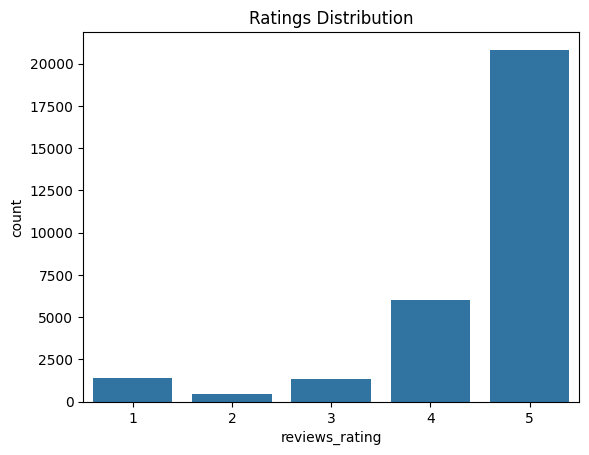

In [83]:
# Rating distribution
sns.countplot(x='reviews_rating', data=pdf_movies_data_set)
plt.title("Ratings Distribution")
plt.show()

## Rating Distribution
* Ratings are 5 star dominant. (ie ~ 66% are 5 start rating)


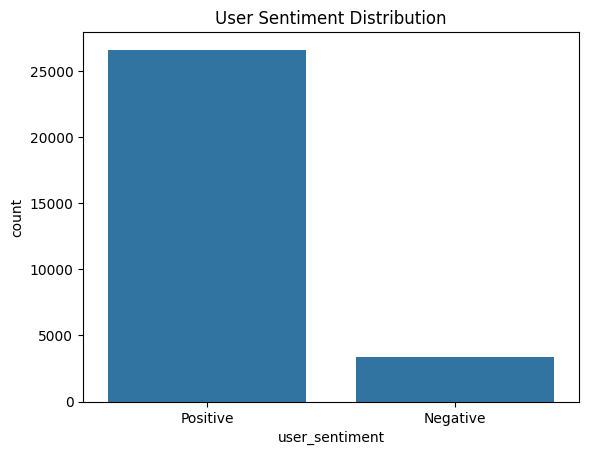

In [84]:
# Sentiment distibution
sns.countplot(x='user_sentiment',data=pdf_movies_data_set)
plt.title('User Sentiment Distribution')
plt.show()

## Sentiment Distribution
* ~83% rating are positive dominant

In [85]:
# Rating vs Sentiment
pd.crosstab(pdf_movies_data_set['reviews_rating'], pdf_movies_data_set['user_sentiment'], normalize='index')


user_sentiment,Negative,Positive
reviews_rating,,
1,0.431358,0.568642
2,0.333333,0.666667
3,0.163569,0.836431
4,0.091362,0.908638
5,0.089294,0.910706


## Negative and Positive vs sentiemnt
* 1-star reviews → 43% Negative, 57% Positive
* 2-star reviews → 33% Negative, 67% Positive
* 3-star reviews → 16% Negative, 84% Positive
* 4-star reviews → 9% Negative, 91% Positive
* 5-star reviews → 9% Negative, 91% Positive

My Ensights
* Lower ratings like 1-star and 2-star are more negative, but still surprisingly, ~57% of 1-star reviews are labeled as Positive.
* This suggests that the user_sentiment column may not fully align with ratings — might be due to noisy labels or because text sentiment doesn't always match rating (e.g., sarcasm, mismatched entries etc).

In [86]:
# Review length
pdf_movies_data_set['review_length'] = pdf_movies_data_set['reviews_text'].astype(str).apply(lambda x: len(x.split()))
print(pdf_movies_data_set['review_length'].describe())

count    30000.000000
mean        34.385800
std         34.556643
min          1.000000
25%         16.000000
50%         25.000000
75%         41.000000
max       1010.000000
Name: review_length, dtype: float64


## Review length points
* mean lenght - 34 words, median lenght - 25 words, 75th % - 41 words,  max_lenght = 1010 words(outlier)
* most review are 25 to 40 words
* few are extremely long like 1010 words which are definetly outliers
* `TF-IDF` or `Bag-of-Words` will work well here, since reviews aren't too long.
* We will truncate reviews at 200 words for better accuracy

## Data Cleanup

In [87]:
# Column with to much null
pdf_movies_data_set = pdf_movies_data_set.drop(columns=['reviews_userCity', 'reviews_userProvince'])

# Droping rows with critical missing values
pdf_movies_data_set = pdf_movies_data_set.dropna(subset=['reviews_username', 'user_sentiment', 'reviews_text'])

# Filling missing values wiht unknown or blank
pdf_movies_data_set['manufacturer'] = pdf_movies_data_set['manufacturer'].fillna("Unknown")
pdf_movies_data_set['reviews_title'] = pdf_movies_data_set['reviews_title'].fillna("")

# Dropping rows with missing review dates(very less)
pdf_movies_data_set = pdf_movies_data_set.dropna(subset=['reviews_date'])

# removing duplicates if any and keeping only first occurance
pdf_movies_data_set = pdf_movies_data_set.drop_duplicates(subset=['reviews_username', 'id', 'reviews_text'])

print('Shape of data set after clean up: ',pdf_movies_data_set.shape)
print("Remaining nulls:\n", pdf_movies_data_set.isnull().sum())


Shape of data set after clean up:  (28104, 14)
Remaining nulls:
 id                         0
brand                      0
categories                 0
manufacturer               0
name                       0
reviews_date               0
reviews_didPurchase    13014
reviews_doRecommend     2064
reviews_rating             0
reviews_text               0
reviews_title              0
reviews_username           0
user_sentiment             0
review_length              0
dtype: int64


* After clean up still we are having 43% nulls in `review_did_Purchase` so lets drop this column as its not usable
* After clean up still we are having 7% nulls in `reviews_doRecommend` so lets fill it wiht mode

In [88]:
pdf_movies_data_set = pdf_movies_data_set.drop(columns=['reviews_didPurchase'])
pdf_movies_data_set['reviews_doRecommend'] = pdf_movies_data_set['reviews_doRecommend'].fillna(pdf_movies_data_set['reviews_doRecommend'].mode()[0])

/tmp/ipython-input-860361527.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  pdf_movies_data_set['reviews_doRecommend'] = pdf_movies_data_set['reviews_doRecommend'].fillna(pdf_movies_data_set['reviews_doRecommend'].mode()[0])


In [89]:
# Lets check nulls again
print("Remaining nulls:\n", pdf_movies_data_set.isnull().sum())


Remaining nulls:
 id                     0
brand                  0
categories             0
manufacturer           0
name                   0
reviews_date           0
reviews_doRecommend    0
reviews_rating         0
reviews_text           0
reviews_title          0
reviews_username       0
user_sentiment         0
review_length          0
dtype: int64


## Lets start with Test processing now
* Turn every thing to lower case
* remove special characters or smilly keys like !, @, *,;),:) etc
* Tokenization
* stop words removal
* Lemmatization (running -> run, eating - eat etc)
* Truncate long review to 200 words


In [90]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
# Initializing tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [91]:
def process_reviews(text):
    text = text.lower()  # turing to lower case
    text = re.sub(r'[^a-z\s]', '', text)  # removing special characters
    tokens = text.split() # Tokenizing by split
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and len(word) > 2]  # Remove stopwords & lemmatize
    tokens = tokens[:200]  # Truncate to 200 words
    return " ".join(tokens)     # Join back all tokens


pdf_movies_data_set['cleaned_reviews_text'] = pdf_movies_data_set['reviews_text'].astype(str).apply(process_reviews)
pdf_movies_data_set[['reviews_text', 'cleaned_reviews_text']].head()

,reviews_text,cleaned_reviews_text
0,i love this album. it's very good. more to the...,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,good flavor review collected part promotion
2,Good flavor.,good flavor
3,I read through the reviews on here before look...,read review looking buying one couple lubrican...
4,My husband bought this gel for us. The gel cau...,husband bought gel gel caused irritation felt ...


In [92]:
# Saving the processed data frame for reviews text to have a look in excel
pdf_reviews = pdf_movies_data_set[['reviews_text', 'cleaned_reviews_text']]
output_path = '/content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/datasets/'
pdf_reviews.to_csv(output_path+'processed_reviews.csv', index=False)
# Saving cleared data set as a save point and to avoinf running complete code again and again
pdf_movies_data_set.to_csv(output_path+'processed_cleaned_movies_dataset.csv', index=False)

## Lets Start with `Feature Extraction` using below three.(One is optional here but i am taking all three)
* Bag-of-Words
* TF-IDF Vectorization
* Word Embeddings (Word2Vec/GloVe)

In [93]:
# Bag-of-Words
from sklearn.feature_extraction.text import CountVectorizer


def bad_of_words(df_train, df_test, max_features=5000):
    bow_vectorizer = CountVectorizer(max_features=5000)
    X_train_bow = bow_vectorizer.fit_transform(df_train)
    X_test_bow = bow_vectorizer.fit_transform(df_test)
    print(f"Train BoW shape: {X_train_bow.shape} and Test Bow shape: {X_test_bow.shape}")
    # saving  BoW as pkl
    pickle.dump(bow_vectorizer,open(models_save_path+'/bow_vectorization.pkl','wb'))

    return X_train_bow, X_test_bow

In [94]:

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorizar(df_train, df_test, max_features=5000):
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features)
    X_train_tfidf = tfidf_vectorizer.fit_transform(df_train)
    X_test_tfidf = tfidf_vectorizer.fit_transform(df_test)
    print(f"Train TD-IDP shape: {X_train_tfidf.shape} and Test TF-IDF shape: {X_test_tfidf.shape}")
    #saving tfidf_vectorizar as pkl
    pickle.dump(tfidf_vectorizer,open(models_save_path+'/tfidf_vectorizer.pkl','wb'))

    return X_train_tfidf, X_test_tfidf



In [95]:
# Word embeddings using word2Vec
! pip3 install gensim
import gensim
from gensim.models import Word2Vec

def build_w2v_features(df_train, df_test, vector_size=5000):
    tokenized_train = [t.split() for t in df_train]
    tokenized_test  = [t.split() for t in df_test]

    # Train Word2Vec model
    w2v_model = Word2Vec(
        sentences=tokenized_train,
        vector_size=vector_size,
        window=5,
        min_count=2,
        workers=4,
        seed=42
    )

    # Helper: average word vectors per review
    def avg_w2v(tokens, model, size):
        vecs = [model.wv[w] for w in tokens if w in model.wv]
        if len(vecs) == 0:
            return np.zeros(size, dtype=np.float32)
        return np.mean(vecs, axis=0)

    # Transform train/test
    X_train_w2v = np.vstack([avg_w2v(toks, w2v_model, vector_size) for toks in tokenized_train])
    X_test_w2v  = np.vstack([avg_w2v(toks, w2v_model, vector_size) for toks in tokenized_test])
    print(f"Train w2v shape: {X_train_w2v.shape} and Test w2v shape: {X_test_w2v.shape}")
    pickle.dump(w2v_model, open(models_save_path+'/word2vec_model.pkl', 'wb'))

    return X_train_w2v, X_test_w2v, w2v_model


In [96]:
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

# Models output Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [97]:
# Changing labels for negative and positive
label_map = {'Positive':1, 'Negative':0}
pdf_movies_data_set['label'] = pdf_movies_data_set['user_sentiment'].map(label_map)
pdf_movies_data_set.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_length,cleaned_reviews_text,label
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,True,5,i love this album. it's very good. more to the...,Just Awesome,joshua,Positive,41,love album good hip hop side current pop sound...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor. This review was collected as part...,Good,dorothy w,Positive,11,good flavor review collected part promotion,1
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,5,Good flavor.,Good,dorothy w,Positive,2,good flavor,1
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,I read through the reviews on here before look...,Disappointed,rebecca,Negative,124,read review looking buying one couple lubrican...,0
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,My husband bought this gel for us. The gel cau...,Irritation,walker557,Negative,25,husband bought gel gel caused irritation felt ...,0


In [98]:
# Creating datasets for train and test split
X_text = pdf_movies_data_set['cleaned_reviews_text'].astype(str).values
y = pdf_movies_data_set['label'].astype(int).values

# Train and test split
X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_text, y, test_size=0.20, random_state=42, stratify=y
)

print(f'shape of train  dataset is {X_train_text.shape} and {y_train.shape}  respectively ')
print(f'shape of test  dataset is {X_test_text.shape} and {y_test.shape}  respectively ')

print("Class balance (train):", np.bincount(y_train))
print("Class balance (test):", np.bincount(y_test))

shape of train  dataset is (22483,) and (22483,)  respectively 
shape of test  dataset is (5621,) and (5621,)  respectively 
Class balance (train): [ 2485 19998]
Class balance (test): [ 621 5000]


In [99]:
X_train_bow, X_test_bow = bad_of_words(X_train_text, X_test_text)
X_train_tfidf, X_test_tfidf = tfidf_vectorizar(X_train_text, X_test_text)
X_train_w2v, X_test_w2v, w2v_model = build_w2v_features(X_train_text, X_test_text)


feature_sets = {
    "BoW": (X_train_bow, X_test_bow, True),
    "TF-IDF": (X_train_tfidf, X_test_tfidf, True),
    "Word2Vec": (X_train_w2v, X_test_w2v, False)
}

Train BoW shape: (22483, 5000) and Test Bow shape: (5621, 5000)
Train TD-IDP shape: (22483, 5000) and Test TF-IDF shape: (5621, 5000)
Train w2v shape: (22483, 5000) and Test w2v shape: (5621, 5000)


In [100]:
# FUnction to evaluate models performance
def evaluate_classifier(clf, X_tr, X_te, y_tr, y_te, convert_dense=False):
    # Convert sparse → dense if needed
    if convert_dense:
        X_tr_in = X_tr.toarray() if hasattr(X_tr, "toarray") else X_tr
        X_te_in = X_te.toarray() if hasattr(X_te, "toarray") else X_te
    else:
        X_tr_in, X_te_in = X_tr, X_te

    clf.fit(X_tr_in, y_tr)
    y_pred = clf.predict(X_te_in)

    # Probabilities (for AUC)
    probs = None
    try:
        probs = clf.predict_proba(X_te_in)[:, 1]
    except:
        try: probs = clf.decision_function(X_te_in)
        except: pass

    return {
        "accuracy": accuracy_score(y_te, y_pred),
        "precision": precision_score(y_te, y_pred, zero_division=0),
        "recall": recall_score(y_te, y_pred, zero_division=0),
        "f1": f1_score(y_te, y_pred, zero_division=0),
        "auc": roc_auc_score(y_te, probs) if probs is not None else np.nan,
    }

In [101]:
# Defining Models

models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    "MultinomialNB": MultinomialNB(), # Naive bias model
    "RandomForest": RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, class_weight='balanced'),
    "XGBoost": XGBClassifier( eval_metric='logloss', n_jobs=-1, random_state=42)
}
results = []

for feat_name, (Xtr, Xte, convert_dense_hint) in feature_sets.items():
    for model_name, model in models.items():
        # Skip NB on Word2Vec
        if model_name == "MultinomialNB" and feat_name == "Word2Vec":
            continue

        convert_dense = True if model_name in ["RandomForest", "XGBoost"] else convert_dense_hint
        print(f"\nTraining {model_name} on {feat_name}...")

        metrics = evaluate_classifier(model, Xtr, Xte, y_train, y_test, convert_dense)
        results.append({
            "feature": feat_name,
            "model": model_name,
            **metrics
        })

        #saving models
        model_name = f"{model_name}_{feat_name}.pkl"
        with open(models_save_path+model_name,'wb') as f:
            pickle.dump(model,f)
        print(f"model:{model_name} saved to {models_save_path+model_name}")




Training LogisticRegression on BoW...
model:LogisticRegression_BoW.pkl saved to /content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/Models/LogisticRegression_BoW.pkl

Training MultinomialNB on BoW...
model:MultinomialNB_BoW.pkl saved to /content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/Models/MultinomialNB_BoW.pkl

Training RandomForest on BoW...
model:RandomForest_BoW.pkl saved to /content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/Models/RandomForest_BoW.pkl

Training XGBoost on BoW...
model:XGBoost_BoW.pkl saved to /content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/Models/XGBoost_BoW.pkl

Training LogisticRegression on TF-IDF...
model:LogisticRegression_TF-IDF.pkl saved to /content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/Models/LogisticRegression_TF-IDF.pkl

Training MultinomialNB on TF-IDF...
model:MultinomialNB_TF-IDF.pkl saved to /content/drive/MyDrive/Colab_Notebooks/Recomm

In [102]:
# Summarizing all the results of all the models on all three feature extractors
results_df = pd.DataFrame(results).sort_values(by=['f1','accuracy'], ascending=False).reset_index(drop=True)



In [103]:
results_df.head(30)

,feature,model,accuracy,precision,recall,f1,auc
0,Word2Vec,RandomForest,0.898772,0.901577,0.9948,0.945897,0.859447
1,Word2Vec,XGBoost,0.900552,0.916995,0.9766,0.945860,0.863194
2,Word2Vec,LogisticRegression,0.726205,0.967072,0.7166,0.823205,0.835224
3,TF-IDF,MultinomialNB,0.441025,0.871006,0.4362,0.581290,0.433939
4,BoW,RandomForest,0.438356,0.901175,0.4140,0.567356,0.524493
5,TF-IDF,RandomForest,0.313112,0.897973,0.2570,0.399627,0.503052
6,BoW,LogisticRegression,0.291585,0.905255,0.2274,0.363491,0.555003
7,BoW,XGBoost,0.247999,0.890010,0.1764,0.294442,0.502242
8,TF-IDF,XGBoost,0.239815,0.889603,0.1660,0.279791,0.499095
9,BoW,MultinomialNB,0.203523,0.858711,0.1252,0.218537,0.432765


## Models training result
Clearly Word2Vec + RandomForest outperforms all other data sets with below stats
* Accuracy: 0.900
* Precision: 0.902
* Recall: 0.995
* F1: 0.946
* accuracy: 0.865

# 2.Building a recommendation system
## User-User recomendation system

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
import math
from collections import defaultdict
import pickle
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

In [105]:
# Reading the above cleaned dataset for recommendation system
cleaned_movies_data_set = '/content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/datasets/processed_cleaned_movies_dataset.csv'
pdf_cleaned_movies_data_set = pd.read_csv(cleaned_movies_data_set, encoding="utf-8")

In [106]:
# Dividing the cleaned data set in train and test data sets
pdf_train, pdf_test = train_test_split(pdf_cleaned_movies_data_set, train_size=0.70,random_state=42 )
print("Train size:",pdf_train.shape)
print("Test size:",pdf_test.shape)

Train size: (19672, 14)
Test size: (8432, 14)


In [107]:
pdf_train.head(2)

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_length,cleaned_reviews_text
19722,AVpfliCoilAPnD_xegIr,Honeywell,"Home,Home Improvement,Home Safety & Security,S...",Honeywell,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,2015-12-16T00:00:00.000Z,True,5,Honeywell fire chest is the perfect size for o...,Great Product,spicesea,Positive,28,honeywell fire chest perfect size important do...
9276,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T01:46:28.000Z,True,5,I love the convience of Clorox Disinfecting Wi...,Great Product For Disinfecting,clnhse,Positive,56,love convience clorox disinfecting wipe fresh ...


In [108]:
# Creating correlation matrix using trains dataset
pdf_train_matrix = pd.pivot_table(data=pdf_train, index='reviews_username', columns='name', values='reviews_rating').fillna(1)
pdf_train_matrix


name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zwithanx,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zxjki,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [109]:
# Creating another pivot for genrating correlation in next steps
pdf_train_matrix1 = pd.pivot_table(data=pdf_train, index='reviews_username', columns='name', values='reviews_rating').fillna(1)

In [110]:
pdf_train_matrix1.loc['01impala']

,01impala
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0
100:Complete First Season (blu-Ray),1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,1.0
...,...
Weleda Everon Lip Balm,1.0
Wilton Black Dots Standard Baking Cups,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0


In [111]:
# Calcualitng adjusted cosine similarity as different users can have different types of rating sequences so it will normalize them within same limit

def cosine_similarity(df):
    mean_df = np.nanmean(df,axis=1)
    substracted_df = (df.T - mean_df).T
    user_correlation = 1- pairwise_distances (substracted_df.fillna(0),metric='cosine')
    user_correlation[np.isnan(user_correlation)] = 0
    return user_correlation,substracted_df

user_corr_matrix, normalized_df = cosine_similarity(pdf_train_matrix1)
user_corr_matrix

array([[ 1.        , -0.00404858, -0.00404858, ..., -0.00404858,
        -0.00404858, -0.00404858],
       [-0.00404858,  1.        ,  1.        , ..., -0.00404858,
        -0.00404858, -0.00404858],
       [-0.00404858,  1.        ,  1.        , ..., -0.00404858,
        -0.00404858, -0.00404858],
       ...,
       [-0.00404858, -0.00404858, -0.00404858, ...,  1.        ,
         1.        ,  1.        ],
       [-0.00404858, -0.00404858, -0.00404858, ...,  1.        ,
         1.        ,  1.        ],
       [-0.00404858, -0.00404858, -0.00404858, ...,  1.        ,
         1.        ,  1.        ]])

In [112]:
user_corr_matrix.shape

(17900, 17900)

In [113]:
# imputing negative values with 0
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(17900, 17900)

In [114]:
# Creating user-user correlation matrix bu dot product

user_pred_ratings = np.dot(user_corr_matrix,pdf_train_matrix1.fillna(0))
user_pred_ratings

array([[ 405.48633999,  406.1312039 ,  405.48633999, ...,  411.20648648,
         406.84840844,  406.16770062],
       [2093.06461664, 2104.8521676 , 2093.06461664, ..., 2104.35448676,
        2094.42668509, 2094.93281757],
       [2093.06461664, 2104.8521676 , 2093.06461664, ..., 2104.35448676,
        2094.42668509, 2094.93281757],
       ...,
       [5273.51992631, 5278.37024595, 5273.51992631, ..., 5281.30067829,
        5275.62819958, 5273.51992631],
       [5273.51992631, 5278.37024595, 5273.51992631, ..., 5281.30067829,
        5275.62819958, 5273.51992631],
       [5273.51992631, 5278.37024595, 5273.51992631, ..., 5281.30067829,
        5275.62819958, 5273.51992631]])

In [115]:
user_pred_ratings.shape

(17900, 248)

In [116]:
user_final_rating = np.multiply(user_pred_ratings,pdf_train_matrix)
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,405.486340,406.131204,405.486340,405.486340,405.486340,405.486340,405.486340,407.692983,405.486340,407.067545,...,405.486340,405.486340,405.486340,406.451271,405.486340,405.486340,405.486340,411.206486,406.848408,406.167701
01impala,2093.064617,2104.852168,2093.064617,2093.064617,2093.064617,2093.064617,2093.064617,2100.999964,2093.064617,2093.064617,...,2093.064617,2096.467767,2093.064617,2094.863356,2093.064617,2093.064617,2093.064617,2104.354487,2094.426685,2094.932818
02dakota,2093.064617,2104.852168,2093.064617,2093.064617,2093.064617,2093.064617,2093.064617,2100.999964,2093.064617,2093.064617,...,2093.064617,2096.467767,2093.064617,2094.863356,2093.064617,2093.064617,2093.064617,2104.354487,2094.426685,2094.932818
02deuce,2093.064617,2104.852168,2093.064617,2093.064617,2093.064617,2093.064617,2093.064617,2100.999964,2093.064617,2093.064617,...,2093.064617,2096.467767,2093.064617,2094.863356,2093.064617,2093.064617,2093.064617,2104.354487,2094.426685,2094.932818
0325home,5273.519926,5278.370246,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5277.905119,5275.379061,5273.519926,...,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5281.300678,5275.628200,5273.519926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,458.457403,462.979416,458.457403,458.457403,458.457403,458.457403,458.457403,461.861984,458.457403,458.457403,...,458.457403,458.457403,458.457403,460.422904,458.457403,458.457403,458.457403,463.671796,458.457403,458.457403
zwithanx,5273.519926,5278.370246,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5277.905119,5275.379061,5273.519926,...,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5281.300678,5275.628200,5273.519926
zxjki,5273.519926,5278.370246,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5277.905119,5275.379061,5273.519926,...,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5273.519926,5281.300678,5275.628200,5273.519926


In [117]:
# creating pickel file to save user-user recomendation system
model_name = f"user_user.pkl"
with open(models_save_path+model_name,'wb') as f:
    pickle.dump(user_final_rating,f)
print(f"model:{model_name} saved to {models_save_path}")



model:user_user.pkl saved to /content/drive/MyDrive/Colab_Notebooks/Recommendation_system/Assignment/Models/


In [118]:
d = user_final_rating
d.loc['01impala'].sort_values(ascending=False)[:20]

,01impala
name,
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,27537.247909
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),2194.709013
The Resident Evil Collection 5 Discs (blu-Ray),2182.081018
Mike Dave Need Wedding Dates (dvd + Digital),2166.426615
Red (special Edition) (dvdvideo),2140.653797
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),2139.056960
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2136.075754
Clorox Disinfecting Bathroom Cleaner,2111.219988
Tostitos Bite Size Tortilla Chips,2110.590119


In [119]:
# extracting commong users in both train and test datasets to compare the outputs
common = pdf_test[pdf_test.reviews_username.isin(pdf_train.reviews_username)]
common.shape

(1294, 14)

In [120]:
# COnverting user-user correlation  matrix to dataframe
corr_df = pd.DataFrame(user_corr_matrix)
corr_df

,0,1,2,3,4,5,6,7,8,9,...,17890,17891,17892,17893,17894,17895,17896,17897,17898,17899
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
17896,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
17897,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
17898,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [121]:
# Adding user_name to above dataframe
corr_df['user_name'] = normalized_df.index
corr_df.set_index('user_name',inplace=True)
corr_df

,0,1,2,3,4,5,6,7,8,9,...,17890,17891,17892,17893,17894,17895,17896,17897,17898,17899
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
zxjki,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [122]:
# extracting user_name as list to be added in columns instead of number
list_name = common.reviews_username.tolist()
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '01impala', '02dakota', '02deuce', '0325home', '06stidriver',
       '08dallas', '09mommy11', '1.11E+24', '11111111aaaaaaaaaaaaaaaaa',
       ...
       'zoso60', 'zowie', 'zozo0o', 'zsazsa', 'zubb', 'zuttle', 'zwithanx',
       'zxjki', 'zyiah4', 'zzz1127'],
      dtype='object', length=17900)

In [123]:
# filtering ount onlt those users that are presentin reviews_username dataset
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1015, 17900)

In [124]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T
corr_df3.head()

,1234,123charlie,1943,1witch,50cal,aaron,abby,abc,ac94,acg1,...,wolvarine,wonderwoman,wonster67,woody,woowoo,xavier,yummy,zach,zippy,zitro
user_name,,,,,,,,,,,,,,,,,,,,,
1234,1.00000,0.51165,0.51165,0.0,0.0,0.353205,0.0,0.0,0.0,0.51165,...,0.0,0.0,0.0,0.613058,0.0,0.302001,0.0,0.0,0.0,0.684524
123charlie,0.51165,1.00000,1.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.511650,0.0,0.597924,0.0,0.0,0.0,0.000000
1943,0.51165,1.00000,1.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.511650,0.0,0.597924,0.0,0.0,0.0,0.000000
1witch,0.00000,0.00000,0.00000,1.0,0.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
50cal,0.00000,0.00000,0.00000,0.0,1.0,0.000000,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0,0.0,0.000000


In [125]:
# Creating pivot for common users between train and test
common_user_tb = pd.pivot_table(data=common,index='reviews_username',
                            columns='name',
                            values='reviews_rating')
common_user_tb

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xavier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
corr_df3[corr_df3<0] = 0
common_user_rating =  np.dot(corr_df3,common_user_tb.fillna(0))
common_user_rating

array([[10.06575002,  0.        ,  0.        , ...,  1.65358108,
        14.28975079,  0.        ],
       [19.74993245,  0.        ,  0.        , ...,  1.52803217,
        12.00750677,  0.        ],
       [19.74993245,  0.        ,  0.        , ...,  1.52803217,
        12.00750677,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.30097885,
        10.22296303,  0.        ]])

In [127]:
dummy_test = common.copy()

# applying 1 if rating is greater than equal to 1 or else 0
dummy_test['reviews_rating'] =dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=dummy_test).fillna(0)
dummy_test

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xavier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
common_user_pred_ratings =  np.multiply(common_user_rating,dummy_test)
common_user_pred_ratings

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.236822,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50cal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xavier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:

X  = common_user_pred_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


(1015, 128)

In [130]:
# finding total NaN values
total_non_nan = np.count_nonzero(~np.isnan(y))
total_non_nan

1220

In [131]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

name,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter","BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",...,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xavier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zach,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# Calculating rmse error
rmse = (np.nansum((common_pivot - y) ** 2) / total_non_nan) ** 0.5
print(rmse)

2.118613329393581


## Item-Item recomendation system

In [133]:
pdf_train_matrix11 = pdf_train_matrix1.T
pdf_train_matrix11

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,11111111aaaaaaaaaaaaaaaaa,...,zoso60,zowie,zozo0o,zsazsa,zubb,zuttle,zwithanx,zxjki,zyiah4,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,1.0,5.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weleda Everon Lip Balm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Wilton Black Dots Standard Baking Cups,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [134]:
item_corr_matrix, normalized_item_df = cosine_similarity(pdf_train_matrix11)
item_corr_matrix.shape

(248, 248)

In [135]:
item_pred_rating = np.dot((pdf_train_matrix11.fillna(0)).T,item_corr_matrix)
item_pred_rating[item_pred_rating<0] = 0
item_pred_rating

array([[1.1466067 , 0.6476641 , 0.86376589, ..., 0.59999005, 0.70659482,
        0.90101179],
       [1.14060818, 0.6398321 , 0.85757519, ..., 0.55426858, 0.68170203,
        0.88337839],
       [1.13009101, 0.61525869, 0.84672107, ..., 0.49930274, 0.65127029,
        0.86865683],
       ...,
       [1.14165223, 0.6208531 , 0.85865269, ..., 0.54470985, 0.6831616 ,
        0.87582972],
       [1.11323287, 0.49019585, 0.82932282, ..., 0.35113615, 0.5962451 ,
        0.80901904],
       [1.12270599, 0.53374826, 0.83909944, ..., 0.41566072, 0.62521726,
        0.83128926]])

In [136]:
#final rating for items
item_final_rating = np.multiply(item_pred_rating,pdf_train_matrix)
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.146607,0.647664,0.863766,0.864664,0.863766,0.863766,0.903627,0.633607,0.900347,1.130063,...,0.903627,0.967918,0.931833,1.016461,0.808714,0.841097,0.931833,0.599990,0.706595,0.901012
01impala,1.140608,0.639832,0.857575,0.858514,0.857575,0.857575,0.899250,0.609629,0.891090,1.081416,...,0.899250,1.010055,0.928738,1.008114,0.800016,0.833874,0.928738,0.554269,0.681702,0.883378
02dakota,1.130091,0.615259,0.846721,0.847732,0.846721,0.846721,0.891575,0.580505,0.874859,1.070633,...,0.891575,1.048192,0.923311,1.026603,0.784765,0.821211,0.923311,0.499303,0.651270,0.868657
02deuce,1.135350,0.627545,0.852148,0.853123,0.852148,0.852148,0.895412,0.595067,0.882975,1.076024,...,0.895412,1.029123,0.926024,1.017359,0.792391,0.827543,0.926024,0.526786,0.666486,0.876018
0325home,1.113233,0.490196,0.829323,0.830448,0.829323,0.829323,0.879273,0.474636,0.871911,1.053350,...,0.879273,0.938384,0.914613,0.955760,0.760320,0.800912,0.914613,0.351136,0.596245,0.809019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.141618,0.658055,0.858617,0.859549,0.858617,0.858617,0.899987,0.627223,0.892648,1.082451,...,0.899987,0.963503,0.929259,1.096259,0.801480,0.835090,0.929259,0.565456,0.680366,0.875749
zwithanx,1.113233,0.490196,0.829323,0.830448,0.829323,0.829323,0.879273,0.474636,0.871911,1.053350,...,0.879273,0.938384,0.914613,0.955760,0.760320,0.800912,0.914613,0.351136,0.596245,0.809019
zxjki,1.141652,0.620853,0.858653,0.859584,0.858653,0.858653,0.900012,0.597724,0.898468,1.082486,...,0.900012,0.963534,0.929276,0.981159,0.801530,0.835132,0.929276,0.544710,0.683162,0.875830


In [137]:
d_item = item_final_rating
d_item.loc['01impala'].sort_values(ascending=False)[:20]

,01impala
name,
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,2.368135
Naturtint Nutrideep Multiplier Protective Cream,2.139568
Kind Nut Delight Bar,1.877791
"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",1.762851
"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",1.752172
Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer,1.647978
Bi-O-kleen Spray & Wipe All Purpose Cleaner,1.585398
"Newman's Own Balsamic Vinaigrette, 16.0oz",1.498805
The Honest Company Laundry Detergent,1.476951


In [138]:
# extracting common item between train and test
common_item = pdf_test[pdf_test.name.isin(pdf_train.name)]
common_item.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,review_length,cleaned_reviews_text
19455,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-12-27T00:00:00.000Z,True,5,"easy to use, smells fresh and disinfects perfe...",wipes,karla114,Positive,18,easy use smell fresh disinfects perfectly revi...
4884,AVpf0eb2LJeJML43EVSt,Sony Pictures,"Movies, Music & Books,Ways To Shop Entertainme...",SONY CORP,The Resident Evil Collection 5 Discs (blu-Ray),2017-01-22T00:00:00.000Z,True,5,If you're huge fan of Resident Evil video game...,Good movies,ripper,Positive,18,youre huge fan resident evil video game stuff ...
10620,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-04T00:00:00.000Z,True,5,I love Clorox wipes! They make my cleaning so ...,Only Brand I Buy,davita,Positive,87,love clorox wipe make cleaning much easier sav...
11388,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-20T00:00:00.000Z,True,5,I used these wipes for my entire kitchen! They...,I used these for my kitchen,annabanana,Positive,43,used wipe entire kitchen dont leave residue kn...
21845,AVpfPaoqLJeJML435Xk9,Warner Home Video,"Movies, Music & Books,Movies,Action & Adventur...",Test,Godzilla 3d Includes Digital Copy Ultraviolet ...,2015-01-11T00:00:00.000Z,False,3,Slow. Not as much action as I expected. Poor a...,Slow,zippy,Negative,10,slow much action expected poor acting


In [139]:
common_item_pivot = common_item.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T

common_item_pivot.shape

(193, 7970)

In [140]:
item_corr_df = pd.DataFrame(item_corr_matrix)
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,1.000000,-0.001074,-0.000217,-0.000215,-0.000217,-0.000217,-0.000153,-0.000992,-0.000324,-0.000215,...,-0.000153,-0.000186,-0.000108,-0.000188,-0.000304,-0.000253,-0.000108,-0.001541,-0.000701,-0.000493
1,-0.001074,1.000000,-0.001108,-0.001101,-0.001108,-0.001108,-0.000784,-0.005078,-0.001657,-0.001101,...,-0.000784,-0.000950,-0.000554,-0.000960,-0.001557,-0.001293,-0.000554,-0.007885,-0.003588,-0.002524
2,-0.000217,-0.001108,1.000000,-0.000222,-0.000224,-0.000224,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
3,-0.000215,-0.001101,-0.000222,1.000000,-0.000222,-0.000222,-0.000157,-0.001017,-0.000332,-0.000221,...,-0.000157,-0.000190,-0.000111,-0.000192,-0.000312,-0.000259,-0.000111,-0.001580,-0.000719,-0.000506
4,-0.000217,-0.001108,-0.000224,-0.000222,1.000000,-0.000224,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,-0.000253,-0.001293,-0.000261,-0.000259,-0.000261,-0.000261,-0.000184,-0.001195,-0.000390,-0.000259,...,-0.000184,-0.000224,-0.000130,-0.000226,-0.000366,1.000000,-0.000130,-0.001855,-0.000844,-0.000594
244,-0.000108,-0.000554,-0.000112,-0.000111,-0.000112,-0.000112,-0.000079,-0.000512,-0.000167,-0.000111,...,-0.000079,-0.000096,-0.000056,-0.000097,-0.000157,-0.000130,1.000000,-0.000795,-0.000362,-0.000255
245,-0.001541,-0.007885,-0.001590,-0.001580,-0.001590,-0.001590,-0.001124,-0.007287,-0.002378,-0.001580,...,-0.001124,-0.001364,-0.000795,-0.001377,-0.002234,-0.001855,-0.000795,1.000000,-0.005149,-0.003622
246,-0.000701,-0.003588,-0.000724,-0.000719,-0.000724,-0.000724,-0.000512,-0.003316,-0.001082,-0.000719,...,-0.000512,-0.000621,-0.000362,-0.000627,-0.001017,-0.000844,-0.000362,-0.005149,1.000000,-0.001648


In [141]:
item_corr_df['name'] = normalized_item_df.index
item_corr_df.set_index('name',inplace=True)
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001074,-0.000217,-0.000215,-0.000217,-0.000217,-0.000153,-0.000992,-0.000324,-0.000215,...,-0.000153,-0.000186,-0.000108,-0.000188,-0.000304,-0.000253,-0.000108,-0.001541,-0.000701,-0.000493
100:Complete First Season (blu-Ray),-0.001074,1.000000,-0.001108,-0.001101,-0.001108,-0.001108,-0.000784,-0.005078,-0.001657,-0.001101,...,-0.000784,-0.000950,-0.000554,-0.000960,-0.001557,-0.001293,-0.000554,-0.007885,-0.003588,-0.002524
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000217,-0.001108,1.000000,-0.000222,-0.000224,-0.000224,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000215,-0.001101,-0.000222,1.000000,-0.000222,-0.000222,-0.000157,-0.001017,-0.000332,-0.000221,...,-0.000157,-0.000190,-0.000111,-0.000192,-0.000312,-0.000259,-0.000111,-0.001580,-0.000719,-0.000506
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000217,-0.001108,-0.000224,-0.000222,1.000000,-0.000224,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weleda Everon Lip Balm,-0.000253,-0.001293,-0.000261,-0.000259,-0.000261,-0.000261,-0.000184,-0.001195,-0.000390,-0.000259,...,-0.000184,-0.000224,-0.000130,-0.000226,-0.000366,1.000000,-0.000130,-0.001855,-0.000844,-0.000594
Wilton Black Dots Standard Baking Cups,-0.000108,-0.000554,-0.000112,-0.000111,-0.000112,-0.000112,-0.000079,-0.000512,-0.000167,-0.000111,...,-0.000079,-0.000096,-0.000056,-0.000097,-0.000157,-0.000130,1.000000,-0.000795,-0.000362,-0.000255
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001541,-0.007885,-0.001590,-0.001580,-0.001590,-0.001590,-0.001124,-0.007287,-0.002378,-0.001580,...,-0.001124,-0.001364,-0.000795,-0.001377,-0.002234,-0.001855,-0.000795,1.000000,-0.005149,-0.003622


In [142]:
list_items = common_item.name.tolist()
item_corr_df.columns = normalized_item_df.index.tolist()
item_corr_df

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001074,-0.000217,-0.000215,-0.000217,-0.000217,-0.000153,-0.000992,-0.000324,-0.000215,...,-0.000153,-0.000186,-0.000108,-0.000188,-0.000304,-0.000253,-0.000108,-0.001541,-0.000701,-0.000493
100:Complete First Season (blu-Ray),-0.001074,1.000000,-0.001108,-0.001101,-0.001108,-0.001108,-0.000784,-0.005078,-0.001657,-0.001101,...,-0.000784,-0.000950,-0.000554,-0.000960,-0.001557,-0.001293,-0.000554,-0.007885,-0.003588,-0.002524
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000217,-0.001108,1.000000,-0.000222,-0.000224,-0.000224,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000215,-0.001101,-0.000222,1.000000,-0.000222,-0.000222,-0.000157,-0.001017,-0.000332,-0.000221,...,-0.000157,-0.000190,-0.000111,-0.000192,-0.000312,-0.000259,-0.000111,-0.001580,-0.000719,-0.000506
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000217,-0.001108,-0.000224,-0.000222,1.000000,-0.000224,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Weleda Everon Lip Balm,-0.000253,-0.001293,-0.000261,-0.000259,-0.000261,-0.000261,-0.000184,-0.001195,-0.000390,-0.000259,...,-0.000184,-0.000224,-0.000130,-0.000226,-0.000366,1.000000,-0.000130,-0.001855,-0.000844,-0.000594
Wilton Black Dots Standard Baking Cups,-0.000108,-0.000554,-0.000112,-0.000111,-0.000112,-0.000112,-0.000079,-0.000512,-0.000167,-0.000111,...,-0.000079,-0.000096,-0.000056,-0.000097,-0.000157,-0.000130,1.000000,-0.000795,-0.000362,-0.000255
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001541,-0.007885,-0.001590,-0.001580,-0.001590,-0.001590,-0.001124,-0.007287,-0.002378,-0.001580,...,-0.001124,-0.001364,-0.000795,-0.001377,-0.002234,-0.001855,-0.000795,1.000000,-0.005149,-0.003622


In [143]:
print(list_items[:10])

['Clorox Disinfecting Bathroom Cleaner', 'The Resident Evil Collection 5 Discs (blu-Ray)', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Clear Scalp & Hair Therapy Total Care Nourishing Shampoo', 'Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total', 'Mike Dave Need Wedding Dates (dvd + Digital)', 'Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd']


In [144]:
print(len(list_items))

8404


In [145]:
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]
item_corr_df1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001074,-0.000217,-0.000215,-0.000217,-0.000217,-0.000153,-0.000992,-0.000324,-0.000215,...,-0.000153,-0.000186,-0.000108,-0.000188,-0.000304,-0.000253,-0.000108,-0.001541,-0.000701,-0.000493
100:Complete First Season (blu-Ray),-0.001074,1.000000,-0.001108,-0.001101,-0.001108,-0.001108,-0.000784,-0.005078,-0.001657,-0.001101,...,-0.000784,-0.000950,-0.000554,-0.000960,-0.001557,-0.001293,-0.000554,-0.007885,-0.003588,-0.002524
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000215,-0.001101,-0.000222,1.000000,-0.000222,-0.000222,-0.000157,-0.001017,-0.000332,-0.000221,...,-0.000157,-0.000190,-0.000111,-0.000192,-0.000312,-0.000259,-0.000111,-0.001580,-0.000719,-0.000506
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000217,-0.001108,-0.000224,-0.000222,1.000000,-0.000224,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
Africa's Best No-Lye Dual Conditioning Relaxer System Super,-0.000217,-0.001108,-0.000224,-0.000222,-0.000224,1.000000,-0.000158,-0.001024,-0.000334,-0.000222,...,-0.000158,-0.000192,-0.000112,-0.000194,-0.000314,-0.000261,-0.000112,-0.001590,-0.000724,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000304,-0.001557,-0.000314,-0.000312,-0.000314,-0.000314,-0.000222,-0.001439,-0.000470,-0.000312,...,-0.000222,-0.000269,-0.000157,-0.000272,1.000000,-0.000366,-0.000157,-0.002234,-0.001017,-0.000715
Weleda Everon Lip Balm,-0.000253,-0.001293,-0.000261,-0.000259,-0.000261,-0.000261,-0.000184,-0.001195,-0.000390,-0.000259,...,-0.000184,-0.000224,-0.000130,-0.000226,-0.000366,1.000000,-0.000130,-0.001855,-0.000844,-0.000594
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001541,-0.007885,-0.001590,-0.001580,-0.001590,-0.001590,-0.001124,-0.007287,-0.002378,-0.001580,...,-0.001124,-0.001364,-0.000795,-0.001377,-0.002234,-0.001855,-0.000795,1.000000,-0.005149,-0.003622


In [146]:
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]
item_corr_df3 = item_corr_df2.T
item_corr_df3

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz",...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001074,-0.000215,-0.000217,-0.000217,-0.000992,-0.000324,-0.000265,-0.000373,-0.000790,...,-0.000888,-0.000851,-0.000824,-0.000153,-0.000188,-0.000304,-0.000253,-0.001541,-0.000701,-0.000493
100:Complete First Season (blu-Ray),-0.001074,1.000000,-0.001101,-0.001108,-0.001108,-0.005078,-0.001657,-0.001357,-0.001907,-0.004045,...,-0.004543,-0.004353,-0.004214,-0.000784,-0.000960,-0.001557,-0.001293,-0.007885,-0.003588,-0.002524
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000215,-0.001101,1.000000,-0.000222,-0.000222,-0.001017,-0.000332,-0.000272,-0.000382,-0.000810,...,-0.000910,-0.000872,-0.000844,-0.000157,-0.000192,-0.000312,-0.000259,-0.001580,-0.000719,-0.000506
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000217,-0.001108,-0.000222,1.000000,-0.000224,-0.001024,-0.000334,-0.000274,-0.000385,-0.000816,...,-0.000916,-0.000878,-0.000850,-0.000158,-0.000194,-0.000314,-0.000261,-0.001590,-0.000724,-0.000509
Africa's Best No-Lye Dual Conditioning Relaxer System Super,-0.000217,-0.001108,-0.000222,-0.000224,1.000000,-0.001024,-0.000334,-0.000274,-0.000385,-0.000816,...,-0.000916,-0.000878,-0.000850,-0.000158,-0.000194,-0.000314,-0.000261,-0.001590,-0.000724,-0.000509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000304,-0.001557,-0.000312,-0.000314,-0.000314,-0.001439,-0.000470,-0.000385,-0.000540,-0.001146,...,-0.001287,-0.001234,-0.001194,-0.000222,-0.000272,1.000000,-0.000366,-0.002234,-0.001017,-0.000715
Weleda Everon Lip Balm,-0.000253,-0.001293,-0.000259,-0.000261,-0.000261,-0.001195,-0.000390,-0.000319,-0.000449,-0.000952,...,-0.001069,-0.001024,-0.000992,-0.000184,-0.000226,-0.000366,1.000000,-0.001855,-0.000844,-0.000594
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001541,-0.007885,-0.001580,-0.001590,-0.001590,-0.007287,-0.002378,-0.001948,-0.002737,-0.005804,...,-0.006519,0.003647,-0.006048,-0.001124,-0.001377,-0.002234,-0.001855,1.000000,-0.005149,-0.003622


In [147]:
item_corr_df3[item_corr_df3<0] = 0
common_item_pred_ratings = np.dot(item_corr_df3,common_item_pivot.fillna(0))
common_item_pred_ratings.shape

(193, 7970)

In [148]:
test_items = common_item.copy()


In [149]:
test_item_tb = test_items.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating').T.fillna(0)
final_item_ratings = np.multiply(common_item_pred_ratings,test_item_tb)
final_item_ratings

reviews_username,00dog3,1085,10ten,1143mom,1234,1234567,1234asdf,123cat123,123charlie,123numbers,...,zoe1988,zokhid,zookeeper,zout22389,zpalma,zsarah,zt313,zulaa118,zxcsdfd,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
X  = final_item_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(193, 7970)

In [151]:
total_non_nan = np.count_nonzero(~np.isnan(y))


In [152]:
# Calculating rmse error
rmse = (np.nansum((common_item_pivot - y) ** 2) / total_non_nan) ** 0.5
print(rmse)

3.5766084883477443


## Clearly from rsme error its clear that user-user based recomendation is better then Item Item based recommendation.

RSME error for User-User system - 2.118613329393581

RSME error for Item-Item system - 3.576608488347744